In [1]:
from models import *
from samplers import *
from tasks import ChebyshevKernelLinearRegression, ChebyshevKernelLeastSquaresModelWithRidge
from matplotlib import pyplot as plt
import numpy as np
import os
from eval import *

In [2]:
sampler = UniformSampler(n_dims=1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1, basis_dim=9, different_degrees=False, lowest_degree=9, highest_degree=9)
run_id = "4b9a372d-d1e4-4d5c-9dcb-bcebd7988cd2"  # if you train more models, replace with the run_id from the table above
run_dir = "../models"
task_name = "kernel_linear_regression"
run_path = os.path.join(run_dir, task_name, run_id)
model, conf = get_model_from_run(run_path, -1)
transformer_model = model.cuda().eval()
more_xs_for_graphing_truth = sampler.sample_xs(1000, 1)
xs = sampler.sample_xs(40, 1)
extra_transformer_estimated = get_imputed_ys(transformer_model, task, xs, more_xs_for_graphing_truth, smoothing=0.03)
extra_ys = task.evaluate(more_xs_for_graphing_truth, noise=False)
ys, noise = task.evaluate(xs)
ys = ys + noise
model = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=9)
model_no_ridge = ChebyshevKernelLeastSquaresModel(basis_dim=9)
predictor = model.return_trained_model(xs, ys)
extra_predicted = predictor(more_xs_for_graphing_truth)
no_ridge_predicted = model_no_ridge.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
xs = xs.squeeze()
ys = ys.squeeze()
more_xs_for_graphing_truth = more_xs_for_graphing_truth.squeeze()
extra_ys = extra_ys.squeeze()
extra_predicted = extra_predicted.squeeze()
extra_transformer_estimated = extra_transformer_estimated.squeeze()
no_ridge_predicted = no_ridge_predicted.squeeze()
extra_indices = np.argsort(more_xs_for_graphing_truth)
more_xs_for_graphing_truth = more_xs_for_graphing_truth[extra_indices]
extra_ys = extra_ys[extra_indices]
extra_transformer_estimated = extra_transformer_estimated[extra_indices]
extra_predicted = extra_predicted[extra_indices]
no_ridge_predicted = no_ridge_predicted[extra_indices]


A shape: torch.Size([1, 10, 10])
B shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 40])
A shape: torch.Size([1, 10, 10])
C shape: torch.Size([1, 10, 10])
D shape: torch.Size([1, 10, 10])
E shape: torch.Size([1, 10, 40])


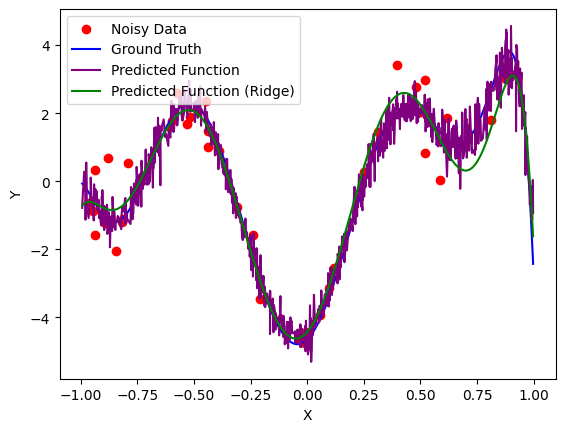

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, color='red', label='Noisy Data')
ax.plot(more_xs_for_graphing_truth, extra_ys, color='blue', label='Ground Truth')
ax.plot(more_xs_for_graphing_truth, extra_transformer_estimated, color='purple', label='Predicted Function')
ax.plot(more_xs_for_graphing_truth, extra_predicted, color='green', label='Predicted Function (Ridge)')
#ax.plot(more_xs_for_graphing_truth, no_ridge_predicted, color='orange', label='Predicted Function (No Ridge)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

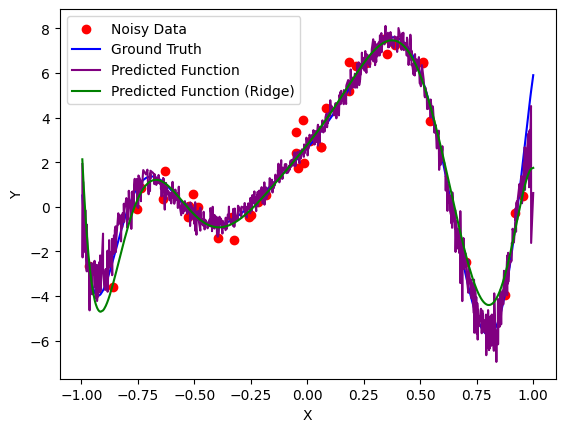

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, color='red', label='Noisy Data')
ax.plot(more_xs_for_graphing_truth, extra_ys, color='blue', label='Ground Truth')
ax.plot(more_xs_for_graphing_truth, extra_transformer_estimated, color='purple', label='Predicted Function')
ax.plot(more_xs_for_graphing_truth, extra_predicted, color='green', label='Predicted Function (Ridge)')
#ax.plot(more_xs_for_graphing_truth, no_ridge_predicted, color='orange', label='Predicted Function (No Ridge)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()